<a href="https://colab.research.google.com/github/RajiRai/GenAI-Tutorial/blob/main/synthetic_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/50], d_loss: 0.21721722185611725, g_loss: 4.082765579223633
Epoch [2/50], d_loss: 0.4236112982034683, g_loss: 2.6667003631591797
Epoch [3/50], d_loss: 0.1473989076912403, g_loss: 4.454196929931641
Epoch [4/50], d_loss: 0.3228202909231186, g_loss: 2.521557331085205
Epoch [5/50], d_loss: 0.2156904749572277, g_loss: 4.246617317199707
Epoch [6/50], d_loss: 0.629231333732605, g_loss: 3.0442004203796387
Epoch [7/50], d_loss: 0.4473417401313782, g_loss: 2.3532803058624268
Epoch [8/50], d_loss: 0.5421758592128754, g_loss: 2.9048666954040527
Epoch [9/50], d_loss: 0.4238300174474716, g_loss: 2.7153334617614746
Epoch [10/50], d_loss: 0.7662279903888702, g_loss: 3.131107807159424


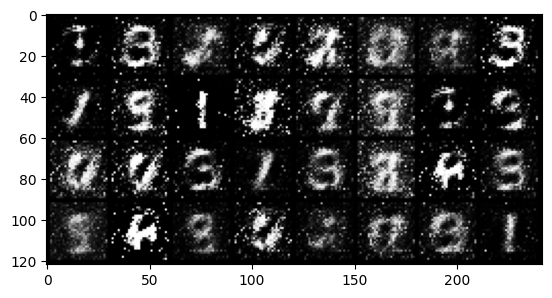

Epoch [11/50], d_loss: 0.660881519317627, g_loss: 3.027139663696289
Epoch [12/50], d_loss: 0.3137088939547539, g_loss: 3.7346839904785156
Epoch [13/50], d_loss: 0.9219384789466858, g_loss: 1.607043743133545
Epoch [14/50], d_loss: 0.7058621495962143, g_loss: 2.556708812713623
Epoch [15/50], d_loss: 0.7257857620716095, g_loss: 1.5553433895111084
Epoch [16/50], d_loss: 0.6647473573684692, g_loss: 2.7411181926727295
Epoch [17/50], d_loss: 0.8316073417663574, g_loss: 2.2023262977600098
Epoch [18/50], d_loss: 0.8955427706241608, g_loss: 2.1438400745391846
Epoch [19/50], d_loss: 0.64055335521698, g_loss: 1.4188814163208008
Epoch [20/50], d_loss: 0.9377031922340393, g_loss: 1.8919124603271484


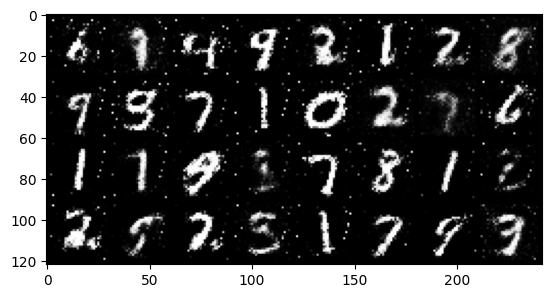

Epoch [21/50], d_loss: 0.7575301229953766, g_loss: 1.7457220554351807
Epoch [22/50], d_loss: 1.0530193746089935, g_loss: 1.568098545074463
Epoch [23/50], d_loss: 1.2829131335020065, g_loss: 1.7282555103302002
Epoch [24/50], d_loss: 0.9230273365974426, g_loss: 2.0121235847473145
Epoch [25/50], d_loss: 0.9976977407932281, g_loss: 1.9070415496826172
Epoch [26/50], d_loss: 0.6834904551506042, g_loss: 1.3756662607192993
Epoch [27/50], d_loss: 0.9644409120082855, g_loss: 1.591930866241455
Epoch [28/50], d_loss: 1.2036778926849365, g_loss: 1.1711920499801636
Epoch [29/50], d_loss: 0.9639230668544769, g_loss: 1.4424391984939575
Epoch [30/50], d_loss: 1.0205404460430145, g_loss: 1.115921139717102


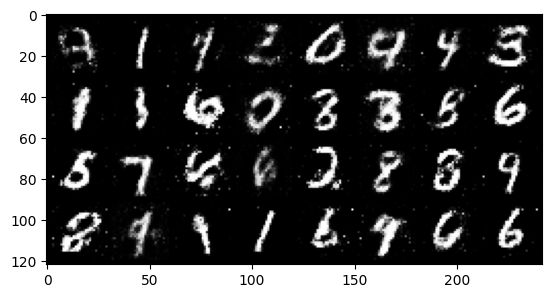

Epoch [31/50], d_loss: 1.0367657542228699, g_loss: 1.5208210945129395
Epoch [32/50], d_loss: 0.9496387243270874, g_loss: 0.996940016746521
Epoch [33/50], d_loss: 1.0117456316947937, g_loss: 0.8908120393753052
Epoch [34/50], d_loss: 1.1337254643440247, g_loss: 1.1105142831802368
Epoch [35/50], d_loss: 1.1265001893043518, g_loss: 1.3176419734954834
Epoch [36/50], d_loss: 0.8379242420196533, g_loss: 1.2455670833587646
Epoch [37/50], d_loss: 1.3075483441352844, g_loss: 1.20231294631958
Epoch [38/50], d_loss: 1.4675583839416504, g_loss: 0.8124141097068787
Epoch [39/50], d_loss: 0.9241679608821869, g_loss: 1.2533429861068726
Epoch [40/50], d_loss: 1.0114587247371674, g_loss: 0.8014894723892212


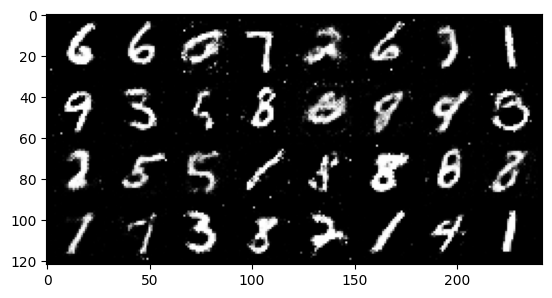

Epoch [41/50], d_loss: 1.1944277882575989, g_loss: 0.9304835796356201
Epoch [42/50], d_loss: 1.053171843290329, g_loss: 1.2531307935714722
Epoch [43/50], d_loss: 1.009025514125824, g_loss: 0.9340302348136902
Epoch [44/50], d_loss: 0.8930094242095947, g_loss: 1.1272590160369873
Epoch [45/50], d_loss: 1.1421127915382385, g_loss: 1.487048625946045
Epoch [46/50], d_loss: 1.0275046825408936, g_loss: 0.9772447943687439
Epoch [47/50], d_loss: 1.1710677444934845, g_loss: 1.142454981803894
Epoch [48/50], d_loss: 1.4304876029491425, g_loss: 0.816952109336853
Epoch [49/50], d_loss: 1.2049013376235962, g_loss: 1.2518305778503418
Epoch [50/50], d_loss: 1.2042416334152222, g_loss: 1.2741553783416748


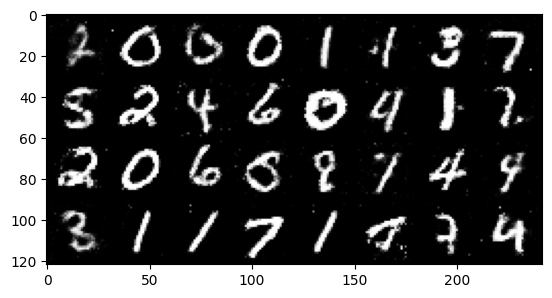

In [ ]:
!pip install torch torchvision

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

# Training the GAN
def train_gan():
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.0002
    num_epochs = 50
    noise_dim = 100

    # Data loading
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    dataloader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

    # Initialize networks
    generator = Generator().cuda()
    discriminator = Discriminator().cuda()

    # Optimizers
    optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
    optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

    # Loss function
    criterion = nn.BCELoss()

    for epoch in range(num_epochs):
        for i, (images, _) in enumerate(dataloader):
            real_images = images.view(-1, 784).cuda()
            real_labels = torch.ones(batch_size, 1).cuda()
            fake_labels = torch.zeros(batch_size, 1).cuda()

            # Train Discriminator
            optimizer_d.zero_grad()
            outputs = discriminator(real_images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            noise = torch.randn(batch_size, noise_dim).cuda()
            fake_images = generator(noise)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            noise = torch.randn(batch_size, noise_dim).cuda()
            fake_images = generator(noise)
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            optimizer_g.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss_real.item() + d_loss_fake.item()}, g_loss: {g_loss.item()}')

        # Display generated images
        if (epoch+1) % 10 == 0:
            noise = torch.randn(batch_size, noise_dim).cuda()
            fake_images = generator(noise)
            fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
            grid = torchvision.utils.make_grid(fake_images, nrow=8, normalize=True)
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.show()

train_gan()
